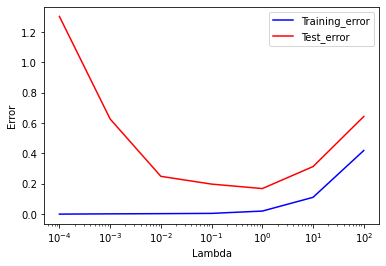

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
train_n = 100
test_n = 1000
d = 100
test_error=[]
train_error=[]
lambd = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
I=np.identity(100)
f = []
g = []
newf=[0,0,0,0,0,0,0]
newg=[0,0,0,0,0,0,0]

for j in range(30):
    X_train = np.random.normal(0,1, size=(100,100))
    a_true = np.random.normal(0,1, size=(100,1))
    y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(100,1))
    X_test = np.random.normal(0,1, size=(1000,100))
    y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(1000,1))
    
    for i in range(len(lambd)):
        
        q=np.dot(lambd[i],I)
        c=np.linalg.inv(np.dot((X_train.T),(X_train))+q)
        d=np.dot(c,X_train.T)
        e=np.dot(d,y_train)
        
        q1=np.dot(lambd[i],I)
        c1=np.linalg.inv(np.dot((X_test.T),(X_test))+q1)
        d1=np.dot(c1,X_test.T)
        e1=np.dot(d1,y_test)
        
        f.append((np.linalg.norm(np.dot(X_train,e)- y_train))/np.linalg.norm(y_train))
        g.append((np.linalg.norm(np.dot(X_test,e)- y_test))/np.linalg.norm(y_test))
        
        newf[i]=f[i]+newf[i]
        newg[i]=g[i]+newg[i]  

avgf=[x/30 for x in newf]
avgg=[x/30 for x in newg]

plt.semilogx(lambd,avgf, color='b',label='Training_error')
plt.semilogx(lambd,avgg, color='r',label='Test_error')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()
plt.show()